In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Parameters:

In [9]:
m = 2           # number of edges to attach from a new node to existing nodes
m0 = m          # initial number of nodes
gamma = 2.5     # exponent for the preferential attachment
n = 10**4       # number of nodes
fixed_seed = 42 # for replicability we fix seed

Krótkie Wyliczenia atrarkcyjności

$$
    \gamma = 2 + \frac{A}{m} \rightarrow A = m(\gamma - 2)
$$

$$
    A = 2 \cdot (2.5-2) = 1, ~ m=2, ~ \gamma = 2.5\\
    A = 1 \cdot (2.2-2) = 0.2, ~ m=1, ~ \gamma = 2.2
$$

In [10]:
A = m*(gamma -2)
A

1.0

In [11]:
np.random.seed(fixed_seed)

Ann fully connected m0

In [12]:
G = nx.Graph()

In [13]:
# Add m0 nodes to the graph
G.add_nodes_from(range(m0))

# Add edges between all nodes
for i in range(m0):
    for j in range(i + 1, m0):
        G.add_edge(i, j)

In [14]:
nodes_array = np.array(list(range(m0))*(m0-1)) # Create initial nodes array
for i in range(m0):
    for _ in range(int(A)):
        nodes_array = np.append(nodes_array, i)

In [15]:
# Add n - m0 nodes to the graph
for i in range(m0, n):
    # Add m edges to the graph
    for _ in range(m):
        # Choose a random node to connect to
        node = np.random.choice(nodes_array)
        nodes_array = np.append(nodes_array, node) # Add the chosen node to the nodes array
        nodes_array = np.append(nodes_array, i) # Add the new node to the nodes array
        for _ in range(int(A)):
            nodes_array = np.append(nodes_array, i)
        G.add_edge(i, node)
        

Text(0.5, 1.0, 'Degree distribution')

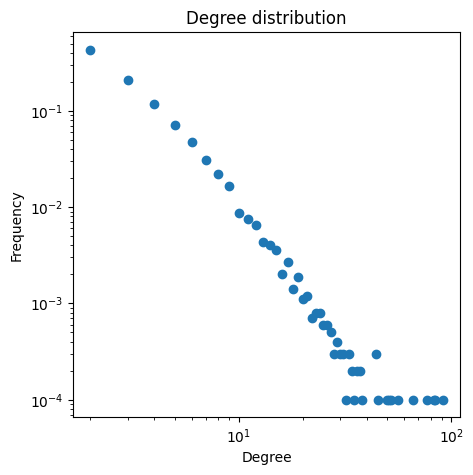

In [16]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
degree_freq = [x / sum(degree_freq) for x in degree_freq]

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(degrees[m:], degree_freq[m:], 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('Frequency')
ax.set_title('Degree distribution')